In [647]:
import numpy as np
import matplotlib.pyplot as plt

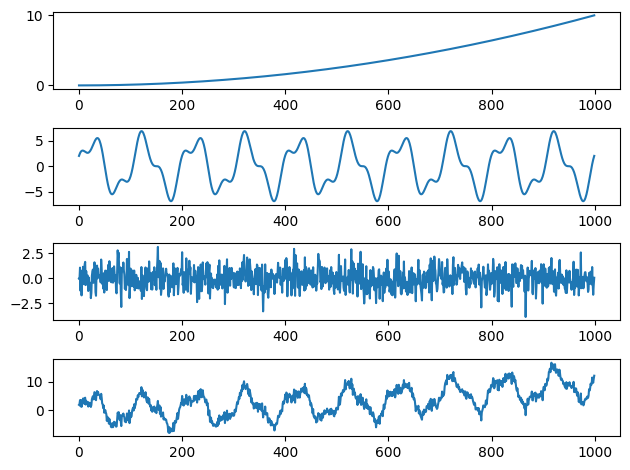

In [648]:
#a )
N = 1000
np.random.seed(21)
t = np.linspace(0, N, N)
trend =  t ** 2  * 1e-5
season = 5 * np.sin(0.02 * np.pi * t) + 2 * np.cos(0.05 * np.pi * t)
noise = np.random.normal(0, 1, N)
ts =  trend + season + noise

fig, axs = plt.subplots(4)
axs[0].plot(trend)
axs[1].plot(season)
axs[2].plot(noise)
axs[3].plot(ts)
plt.tight_layout()
plt.show()

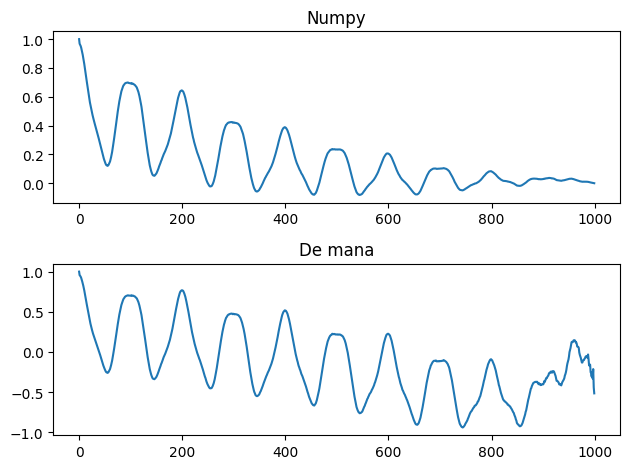

In [649]:
# b)

np_autocorrelation = np.correlate(ts, ts, mode='full')
np_autocorrelation = np_autocorrelation[len(np_autocorrelation)//2:]
np_autocorrelation /= np.max(np_autocorrelation)

def autocorrelate(series, lag):
    n = len(series)
    mean = np.mean(series)
    return np.sum((series[lag:] - mean) * (series[:n-lag] - mean)) / (n - lag)

autocorrelation = [autocorrelate(ts, i) for i in range(1000)]
autocorrelation /= np.max(autocorrelation[0])

fig, axs = plt.subplots(2)
axs[0].plot(np_autocorrelation)
axs[0].set_title("Numpy")
axs[1].plot(autocorrelation)
axs[1].set_title("De mana")
plt.tight_layout()
plt.show()


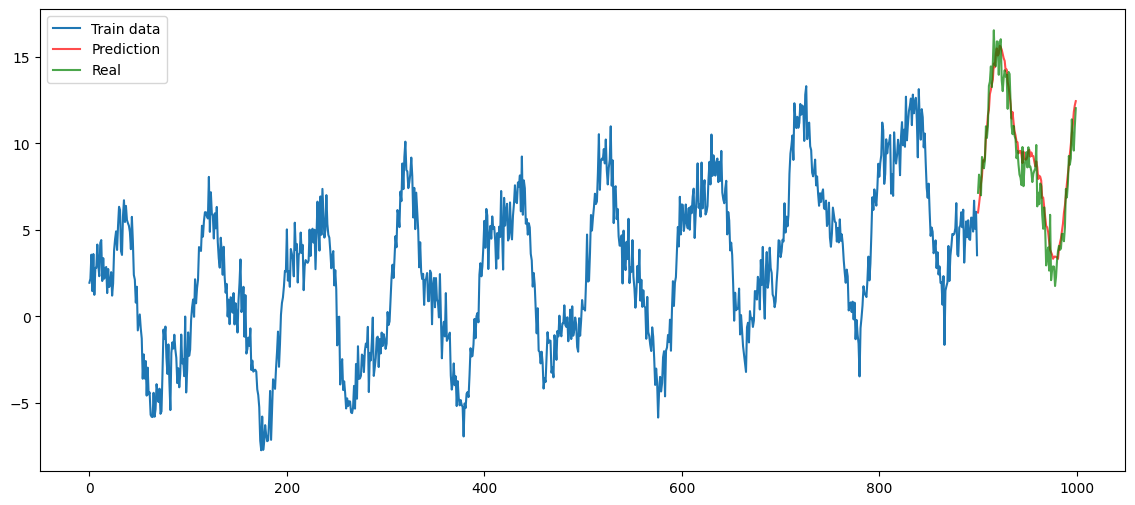

In [650]:
#c)
def autoregression(ts, p):
    train_data = ts[:-p]
    test_data = ts[-p:]
    y = train_data[p:]
    m = len(y)

    Y = np.zeros((m, p))
    for i in range(p):
        Y[:, i] = train_data[i:i-p]

    big_gamma = Y.T @ Y 
    small_gamma = Y.T @ y
    x_star = np.linalg.inv(big_gamma) @ small_gamma

    pred = []
    for i in range(p):
        last_p = np.append(train_data, pred)[-p:]
        pred = np.append(pred, x_star @ last_p)

    return train_data, test_data, pred


N = len(ts)
train_data, test_data, pred  = autoregression(ts, 100)
x_pred = np.arange(len(train_data), len(train_data) + len(pred))
plt.figure(figsize=(14, 6))
plt.plot(train_data, label="Train data")
plt.plot(x_pred, pred, "r-", label="Prediction", alpha=0.7)
plt.plot(x_pred, test_data, "g-", label="Real", alpha=0.7)
plt.legend()
plt.show()

In [651]:
def autoregression_tune(ts):
    N = len(ts)
    best_error = np.inf
    for m in range(4, N):
        for p in range(2, m):
            if m + p > N:
                break
            train_data = ts[:-p]
            test_data = ts[-p:]
            y = train_data[:m]

            Y = np.zeros((m, p))
            for j in range(p):
                Y[:, j] = train_data[j:j+m]
            x_star, _, _, _ = np.linalg.lstsq(Y, y, rcond=None)
            pred  = x_star @ train_data[-p:]
            error = np.sum((pred - test_data[-1]) ** 2)
            if error < best_error:
                print(f"New best error: {error}, p: {p}, m: {m}")
                best_error = error
                best_p = p
                best_m = m
    return best_p, best_m

p, m = autoregression_tune(ts)
print(f"Best p: {p}, m: {m}")

New best error: 3.412769882577001, p: 2, m: 4
New best error: 3.412769882576981, p: 2, m: 7
New best error: 3.4127698825769746, p: 2, m: 15
New best error: 3.281225210975803, p: 31, m: 32
New best error: 3.2812252109757902, p: 31, m: 33
New best error: 1.0466144919298583, p: 32, m: 33
New best error: 1.046614491929833, p: 32, m: 34
New best error: 1.0466144919298184, p: 32, m: 36
New best error: 0.0014568467699526424, p: 35, m: 36
New best error: 0.0014568467699516933, p: 35, m: 37
New best error: 0.0014568467699508795, p: 35, m: 151
New best error: 0.0014568467699453199, p: 35, m: 158
New best error: 0.0014568467699443706, p: 35, m: 163
New best error: 0.001456846769943557, p: 35, m: 165


ValueError: could not broadcast input array from shape (334,) into shape (335,)